In [1]:
import tensorflow as tf
from keras.utils.np_utils import to_categorical
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.optimizers import SGD
from keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ParameterGrid
from keras.wrappers.scikit_learn import KerasClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import pickle

C:\Users\Bober\Anaconda2\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
traindata = pd.DataFrame(pickle.load(open('data\TrainData.p','rb')))
traindata = traindata.sample(n = len(traindata))
testdata = pd.DataFrame(pickle.load(open('data\TestData.p','rb')))

In [3]:
Xtrain, ytrain = traindata.iloc[:,0:2304], traindata.iloc[:,2304]
Xtest, ytest = testdata.iloc[:,0:2304], testdata.iloc[:,2304]

In [4]:
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [5]:
optimizer = SGD(lr=1e-3, momentum=0.9)
#optimizer = Adam()

In [6]:
def plot_epochs(history):
    plt.plot(history.history['categorical_accuracy'], label = 'training accuracy')
    plt.plot(history.history['val_categorical_accuracy'], label = 'validation accuracy')
    plt.legend()

In [7]:
def create_model(n_hidden_layers,n_nodes, dropout = True, 
                 dropout_rate = 0.5, batch_norm=False):
    '''
    Create a neural network with relu hidden activation and softmax output.
    Options to include dropout, and batch normalization
    '''
    hidden_layers = [n_nodes]*n_hidden_layers
    model = Sequential()
    
    for layer, n_nodes in enumerate(hidden_layers):
        if layer == 0:
            print('adding hidden layer')
            model.add(Dense(n_nodes, input_dim=2304))
            
            if dropout:
                print('adding dropout layer')
                model.add(Dropout(dropout_rate))
                
            if batch_norm:
                print('adding batch norm layer')
                model.add(BatchNormalization())
                
            print('adding relu activation')
            model.add(Activation('relu'))
            
        else:
            print('adding hidden layer')
            model.add(Dense(n_nodes))
            
            if dropout:
                print('adding dropout layer')
                model.add(Dropout(dropout_rate))
                
            if batch_norm:
                print('adding batch norm layer')
                model.add(BatchNormalization())
                
            print('adding relu activation')
            model.add(Activation('relu'))
            
    print('adding ouput layer')
    model.add(Dense(7))
        
    print('adding softmax activation')
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])
    return model

In [8]:
n_hidden_layers = [3, 5]
n_nodes = [200,400]
batch_norm = [True, False]
dropout_rate = [0,0.2,0.4]
param_grid = dict(n_hidden_layers = n_hidden_layers, 
                  n_nodes=n_nodes,
                 dropout_rate = dropout_rate,
                batch_norm = batch_norm)
param_grid = ParameterGrid(param_grid)

In [9]:
results = []
Xtrain2, ytrain2 = Xtrain.iloc[7000:,:],ytrain[7000:]
Xval, yval = Xtrain.iloc[:7000,:],ytrain[:7000]

for settings in param_grid:
    mod = create_model(settings['n_hidden_layers'], settings['n_nodes'], 
                        dropout_rate = settings['dropout_rate'], 
                       batch_norm = settings['batch_norm'])
    
    history = mod.fit(Xtrain2,ytrain2, verbose= 0, epochs = 100, batch_size = 100, validation_data=(Xval, yval))
    results.append((settings,history.history['val_categorical_accuracy'][-1]))
    print(history.history['val_categorical_accuracy'][-1])

adding hidden layer
adding dropout layer
adding batch norm layer
adding relu activation
adding hidden layer
adding dropout layer
adding batch norm layer
adding relu activation
adding hidden layer
adding dropout layer
adding batch norm layer
adding relu activation
adding ouput layer
adding softmax activation
0.43185713972364154
adding hidden layer
adding dropout layer
adding batch norm layer
adding relu activation
adding hidden layer
adding dropout layer
adding batch norm layer
adding relu activation
adding hidden layer
adding dropout layer
adding batch norm layer
adding relu activation
adding ouput layer
adding softmax activation
0.43599999759878433
adding hidden layer
adding dropout layer
adding batch norm layer
adding relu activation
adding hidden layer
adding dropout layer
adding batch norm layer
adding relu activation
adding hidden layer
adding dropout layer
adding batch norm layer
adding relu activation
adding hidden layer
adding dropout layer
adding batch norm layer
adding relu a

0.23128571276153836
adding hidden layer
adding dropout layer
adding relu activation
adding hidden layer
adding dropout layer
adding relu activation
adding hidden layer
adding dropout layer
adding relu activation
adding hidden layer
adding dropout layer
adding relu activation
adding hidden layer
adding dropout layer
adding relu activation
adding ouput layer
adding softmax activation
0.23157142698764802


In [10]:
results = sorted(results, key = lambda x: x[1])
for r in results[-5:]:
    print(r)

({'batch_norm': False, 'dropout_rate': 0, 'n_hidden_layers': 3, 'n_nodes': 400}, 0.42299999935286386)
({'batch_norm': True, 'dropout_rate': 0, 'n_hidden_layers': 3, 'n_nodes': 200}, 0.43185713972364154)
({'batch_norm': True, 'dropout_rate': 0, 'n_hidden_layers': 3, 'n_nodes': 400}, 0.43599999759878433)
({'batch_norm': True, 'dropout_rate': 0.2, 'n_hidden_layers': 3, 'n_nodes': 400}, 0.45442857018538885)
({'batch_norm': True, 'dropout_rate': 0, 'n_hidden_layers': 5, 'n_nodes': 200}, 0.4598571402685983)


In [52]:
ann_3hiddenlayer = create_model(3,400, dropout= True,batch_norm = True, dropout_rate=.2)

adding hidden layer
adding dropout layer
adding batch norm layer
adding relu activation
adding hidden layer
adding dropout layer
adding batch norm layer
adding relu activation
adding hidden layer
adding dropout layer
adding batch norm layer
adding relu activation
adding ouput layer
adding softmax activation


In [53]:
history = ann_3hiddenlayer.fit(Xtrain,ytrain, epochs = 200,verbose = 1,validation_data= (Xtest,ytest),batch_size=100)

Train on 31761 samples, validate on 7178 samples
Epoch 1/200
31761/31761 [==============================] - 6s 180us/step - loss: 2.0055 - categorical_accuracy: 0.2202 - val_loss: 1.7577 - val_categorical_accuracy: 0.2934
Epoch 2/200
31761/31761 [==============================] - 3s 90us/step - loss: 1.8511 - categorical_accuracy: 0.2796 - val_loss: 1.6912 - val_categorical_accuracy: 0.3349
Epoch 3/200
31761/31761 [==============================] - 3s 94us/step - loss: 1.7634 - categorical_accuracy: 0.3158 - val_loss: 1.7036 - val_categorical_accuracy: 0.3475
Epoch 4/200
31761/31761 [==============================] - 3s 89us/step - loss: 1.7030 - categorical_accuracy: 0.3455 - val_loss: 1.6509 - val_categorical_accuracy: 0.3569
Epoch 5/200
31761/31761 [==============================] - 3s 86us/step - loss: 1.6541 - categorical_accuracy: 0.3649 - val_loss: 1.7116 - val_categorical_accuracy: 0.3291
Epoch 6/200
31761/31761 [==============================] - 3s 94us/step - loss: 1.6018 - c

31761/31761 [==============================] - 3s 83us/step - loss: 0.7209 - categorical_accuracy: 0.7364 - val_loss: 2.0897 - val_categorical_accuracy: 0.4115
Epoch 96/200
31761/31761 [==============================] - 3s 84us/step - loss: 0.7196 - categorical_accuracy: 0.7346 - val_loss: 2.2065 - val_categorical_accuracy: 0.3957
Epoch 97/200
31761/31761 [==============================] - 3s 84us/step - loss: 0.7202 - categorical_accuracy: 0.7354 - val_loss: 2.0691 - val_categorical_accuracy: 0.3831
Epoch 98/200
31761/31761 [==============================] - 3s 87us/step - loss: 0.7075 - categorical_accuracy: 0.7382 - val_loss: 2.0936 - val_categorical_accuracy: 0.4178
Epoch 99/200
31761/31761 [==============================] - 3s 91us/step - loss: 0.6981 - categorical_accuracy: 0.7422 - val_loss: 2.3058 - val_categorical_accuracy: 0.3511
Epoch 100/200
31761/31761 [==============================] - 3s 85us/step - loss: 0.6969 - categorical_accuracy: 0.7448 - val_loss: 1.8687 - val_cat

31761/31761 [==============================] - 3s 81us/step - loss: 0.3368 - categorical_accuracy: 0.8804 - val_loss: 2.7052 - val_categorical_accuracy: 0.4253
Epoch 190/200
31761/31761 [==============================] - 3s 84us/step - loss: 0.3326 - categorical_accuracy: 0.8813 - val_loss: 2.5730 - val_categorical_accuracy: 0.4223
Epoch 191/200
31761/31761 [==============================] - 3s 84us/step - loss: 0.3215 - categorical_accuracy: 0.8863 - val_loss: 2.7848 - val_categorical_accuracy: 0.4058
Epoch 192/200
31761/31761 [==============================] - 3s 87us/step - loss: 0.3237 - categorical_accuracy: 0.8860 - val_loss: 2.9089 - val_categorical_accuracy: 0.3973
Epoch 193/200
31761/31761 [==============================] - 3s 83us/step - loss: 0.3236 - categorical_accuracy: 0.8854 - val_loss: 2.6599 - val_categorical_accuracy: 0.4267
Epoch 194/200
31761/31761 [==============================] - 3s 83us/step - loss: 0.3205 - categorical_accuracy: 0.8864 - val_loss: 2.6865 - val

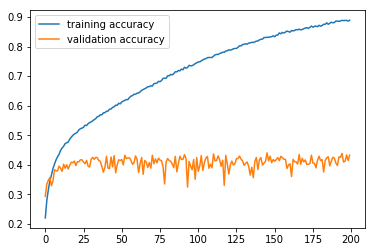

In [54]:
plot_epochs(history)

In [55]:
preds = np.argmax(ann_3hiddenlayer.predict(Xtest),axis = 1)
print(classification_report(y_true = np.argmax(ytest,axis=1), y_pred = preds))
print('\n')
print('accuracy', np.round(np.mean(preds ==  np.argmax(ytest,axis=1)),2))
print('\n')
print('confusion matrix')
print(confusion_matrix(y_true =  np.argmax(ytest,axis=1), y_pred = preds))

             precision    recall  f1-score   support

          0       0.32      0.28      0.30       958
          1       0.53      0.37      0.44       111
          2       0.36      0.26      0.30      1024
          3       0.47      0.74      0.57      1774
          4       0.33      0.31      0.32      1247
          5       0.69      0.54      0.60       831
          6       0.43      0.32      0.37      1233

avg / total       0.43      0.43      0.42      7178



accuracy 0.43


confusion matrix
[[ 266    3   84  311  157   29  108]
 [  11   41    6   32   12    2    7]
 [ 122    6  265  284  202   68   77]
 [ 101    7   66 1311  150   29  110]
 [ 160    9  123  355  382   43  175]
 [  67    2   95  129   51  447   40]
 [ 108    9   95  391  209   30  391]]


In [12]:
model = Sequential()
model.add(Dense(2000, input_dim=2304))
model.add(Activation('relu'))
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dense(7))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])

In [13]:
history = model.fit(Xtrain,ytrain, epochs = 200,verbose = 1,validation_data= (Xtest,ytest),batch_size=100)

Train on 31761 samples, validate on 7178 samples
Epoch 1/200
31761/31761 [==============================] - 2s 73us/step - loss: 1.8550 - categorical_accuracy: 0.2607 - val_loss: 1.7886 - val_categorical_accuracy: 0.3144
Epoch 2/200
31761/31761 [==============================] - 2s 67us/step - loss: 1.7696 - categorical_accuracy: 0.3194 - val_loss: 1.7302 - val_categorical_accuracy: 0.3300
Epoch 3/200
31761/31761 [==============================] - 2s 66us/step - loss: 1.7208 - categorical_accuracy: 0.3430 - val_loss: 1.7120 - val_categorical_accuracy: 0.3412
Epoch 4/200
31761/31761 [==============================] - 2s 66us/step - loss: 1.6841 - categorical_accuracy: 0.3601 - val_loss: 1.6819 - val_categorical_accuracy: 0.3625
Epoch 5/200
31761/31761 [==============================] - 2s 66us/step - loss: 1.6547 - categorical_accuracy: 0.3747 - val_loss: 1.6273 - val_categorical_accuracy: 0.3807
Epoch 6/200
31761/31761 [==============================] - 2s 66us/step - loss: 1.6288 - ca

31761/31761 [==============================] - 2s 66us/step - loss: 0.2289 - categorical_accuracy: 0.9328 - val_loss: 2.3163 - val_categorical_accuracy: 0.4576
Epoch 96/200
31761/31761 [==============================] - 2s 65us/step - loss: 0.2278 - categorical_accuracy: 0.9305 - val_loss: 2.3155 - val_categorical_accuracy: 0.4397
Epoch 97/200
31761/31761 [==============================] - 2s 66us/step - loss: 0.2254 - categorical_accuracy: 0.9321 - val_loss: 2.2733 - val_categorical_accuracy: 0.4423
Epoch 98/200
31761/31761 [==============================] - 2s 66us/step - loss: 0.2472 - categorical_accuracy: 0.9219 - val_loss: 2.2495 - val_categorical_accuracy: 0.4618
Epoch 99/200
31761/31761 [==============================] - 2s 65us/step - loss: 0.2077 - categorical_accuracy: 0.9384 - val_loss: 2.4570 - val_categorical_accuracy: 0.4618
Epoch 100/200
31761/31761 [==============================] - 2s 65us/step - loss: 0.1899 - categorical_accuracy: 0.9459 - val_loss: 2.3853 - val_cat

31761/31761 [==============================] - 2s 65us/step - loss: 0.0249 - categorical_accuracy: 0.9955 - val_loss: 3.2927 - val_categorical_accuracy: 0.4675
Epoch 190/200
31761/31761 [==============================] - 2s 65us/step - loss: 0.0296 - categorical_accuracy: 0.9940 - val_loss: 3.3696 - val_categorical_accuracy: 0.4556
Epoch 191/200
31761/31761 [==============================] - 2s 66us/step - loss: 0.0288 - categorical_accuracy: 0.9946 - val_loss: 3.3396 - val_categorical_accuracy: 0.4648
Epoch 192/200
31761/31761 [==============================] - 2s 65us/step - loss: 0.0210 - categorical_accuracy: 0.9965 - val_loss: 3.3509 - val_categorical_accuracy: 0.4618
Epoch 193/200
31761/31761 [==============================] - 2s 66us/step - loss: 0.0232 - categorical_accuracy: 0.9955 - val_loss: 3.5048 - val_categorical_accuracy: 0.4441
Epoch 194/200
31761/31761 [==============================] - 2s 66us/step - loss: 0.0255 - categorical_accuracy: 0.9952 - val_loss: 3.4718 - val

             precision    recall  f1-score   support

          0       0.36      0.35      0.36       958
          1       0.56      0.47      0.51       111
          2       0.32      0.41      0.36      1024
          3       0.60      0.58      0.59      1774
          4       0.35      0.35      0.35      1247
          5       0.71      0.58      0.64       831
          6       0.41      0.39      0.40      1233

avg / total       0.46      0.45      0.46      7178



accuracy 0.45


confusion matrix
[[ 338    9  156  135  161   30  129]
 [  14   52    9   11   10    3   12]
 [ 109    8  420  111  187   62  127]
 [ 153    5  186 1024  181   40  185]
 [ 154   11  234  188  442   29  189]
 [  37    4  132   56   55  485   62]
 [ 128    4  187  183  214   34  483]]


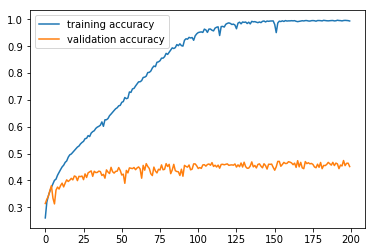

In [14]:
plot_epochs(history)
preds = np.argmax(model.predict(Xtest),axis = 1)
print(classification_report(y_true = np.argmax(ytest,axis=1), y_pred = preds))
print('\n')
print('accuracy', np.round(np.mean(preds ==  np.argmax(ytest,axis=1)),2))
print('\n')
print('confusion matrix')
print(confusion_matrix(y_true =  np.argmax(ytest,axis=1), y_pred = preds))

In [8]:
model = Sequential()
model.add(Dense(2000, input_dim=2304))
model.add(Dropout(.2))
model.add(Activation('relu'))
model.add(Dense(1000))
model.add(Dropout(.2))
model.add(Activation('relu'))
model.add(Dense(500))
model.add(Dropout(.2))
model.add(Activation('relu'))
model.add(Dense(7))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])

In [9]:
history = model.fit(Xtrain,ytrain, epochs = 200,verbose = 1,validation_data= (Xtest,ytest),batch_size=100)

Train on 31761 samples, validate on 7178 samples
Epoch 1/200
31761/31761 [==============================] - 5s 146us/step - loss: 1.9057 - categorical_accuracy: 0.2235 - val_loss: 1.8318 - val_categorical_accuracy: 0.2970
Epoch 2/200
31761/31761 [==============================] - 2s 70us/step - loss: 1.8419 - categorical_accuracy: 0.2706 - val_loss: 1.7689 - val_categorical_accuracy: 0.3121
Epoch 3/200
31761/31761 [==============================] - 2s 71us/step - loss: 1.8015 - categorical_accuracy: 0.2981 - val_loss: 1.7188 - val_categorical_accuracy: 0.3423
Epoch 4/200
31761/31761 [==============================] - 2s 70us/step - loss: 1.7656 - categorical_accuracy: 0.3183 - val_loss: 1.7328 - val_categorical_accuracy: 0.3330
Epoch 5/200
31761/31761 [==============================] - 2s 70us/step - loss: 1.7404 - categorical_accuracy: 0.3264 - val_loss: 1.7081 - val_categorical_accuracy: 0.3383
Epoch 6/200
31761/31761 [==============================] - 2s 71us/step - loss: 1.7173 - c

31761/31761 [==============================] - 2s 70us/step - loss: 0.8387 - categorical_accuracy: 0.6866 - val_loss: 1.5790 - val_categorical_accuracy: 0.4536
Epoch 96/200
31761/31761 [==============================] - 2s 71us/step - loss: 0.8254 - categorical_accuracy: 0.6939 - val_loss: 1.5924 - val_categorical_accuracy: 0.4459
Epoch 97/200
31761/31761 [==============================] - 2s 72us/step - loss: 0.8217 - categorical_accuracy: 0.6959 - val_loss: 1.6159 - val_categorical_accuracy: 0.4482
Epoch 98/200
31761/31761 [==============================] - 2s 71us/step - loss: 0.8084 - categorical_accuracy: 0.7036 - val_loss: 1.6149 - val_categorical_accuracy: 0.4427
Epoch 99/200
31761/31761 [==============================] - 2s 71us/step - loss: 0.8126 - categorical_accuracy: 0.6993 - val_loss: 1.6428 - val_categorical_accuracy: 0.4437
Epoch 100/200
31761/31761 [==============================] - 2s 71us/step - loss: 0.7957 - categorical_accuracy: 0.7037 - val_loss: 1.6227 - val_cat

Epoch 188/200
31761/31761 [==============================] - 2s 71us/step - loss: 0.3285 - categorical_accuracy: 0.8828 - val_loss: 2.2304 - val_categorical_accuracy: 0.4652
Epoch 189/200
31761/31761 [==============================] - 2s 71us/step - loss: 0.3351 - categorical_accuracy: 0.8808 - val_loss: 2.1924 - val_categorical_accuracy: 0.4702
Epoch 190/200
31761/31761 [==============================] - ETA: 0s - loss: 0.3251 - categorical_accuracy: 0.8842 ETA: 0s - loss: 0.330 - 2s 72us/step - loss: 0.3256 - categorical_accuracy: 0.8839 - val_loss: 2.1965 - val_categorical_accuracy: 0.4831
Epoch 191/200
31761/31761 [==============================] - 2s 71us/step - loss: 0.3288 - categorical_accuracy: 0.8837 - val_loss: 2.2884 - val_categorical_accuracy: 0.4755
Epoch 192/200
31761/31761 [==============================] - 2s 72us/step - loss: 0.3103 - categorical_accuracy: 0.8908 - val_loss: 2.2600 - val_categorical_accuracy: 0.4719
Epoch 193/200
31761/31761 [=========================

             precision    recall  f1-score   support

          0       0.44      0.23      0.30       958
          1       0.81      0.42      0.56       111
          2       0.37      0.34      0.35      1024
          3       0.51      0.76      0.61      1774
          4       0.39      0.35      0.37      1247
          5       0.64      0.61      0.63       831
          6       0.43      0.40      0.41      1233

avg / total       0.47      0.47      0.46      7178



accuracy 0.47


confusion matrix
[[ 216    3  122  291  149   53  124]
 [   5   47    9   28    7    2   13]
 [  69    2  345  222  154   94  138]
 [  45    3   80 1354  124   40  128]
 [  86    2  168  344  433   37  177]
 [  20    0   91   97   48  510   65]
 [  51    1  111  336  186   60  488]]


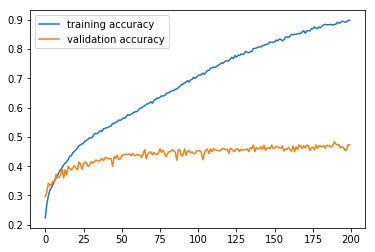

In [11]:
plot_epochs(history)
preds = np.argmax(model.predict(Xtest),axis = 1)
print(classification_report(y_true = np.argmax(ytest,axis=1), y_pred = preds))
print('\n')
print('accuracy', np.round(np.mean(preds ==  np.argmax(ytest,axis=1)),2))
print('\n')
print('confusion matrix')
print(confusion_matrix(y_true =  np.argmax(ytest,axis=1), y_pred = preds))

In [15]:
model = Sequential()
model.add(Dense(2000, input_dim=2304))
model.add(Dropout(.4))
model.add(Activation('relu'))
model.add(Dense(1000))
model.add(Dropout(.4))
model.add(Activation('relu'))
model.add(Dense(500))
model.add(Dropout(.4))
model.add(Activation('relu'))
model.add(Dense(7))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])

In [16]:
history = model.fit(Xtrain,ytrain, epochs = 200,verbose = 1,validation_data= (Xtest,ytest),batch_size=100)

Train on 31761 samples, validate on 7178 samples
Epoch 1/200
31761/31761 [==============================] - 3s 79us/step - loss: 1.9496 - categorical_accuracy: 0.2049 - val_loss: 1.8802 - val_categorical_accuracy: 0.2524
Epoch 2/200
31761/31761 [==============================] - 2s 70us/step - loss: 1.8965 - categorical_accuracy: 0.2288 - val_loss: 1.8360 - val_categorical_accuracy: 0.2767
Epoch 3/200
31761/31761 [==============================] - 2s 69us/step - loss: 1.8703 - categorical_accuracy: 0.2494 - val_loss: 1.8095 - val_categorical_accuracy: 0.3207
Epoch 4/200
31761/31761 [==============================] - 2s 69us/step - loss: 1.8489 - categorical_accuracy: 0.2625 - val_loss: 1.7802 - val_categorical_accuracy: 0.3181
Epoch 5/200
31761/31761 [==============================] - 2s 68us/step - loss: 1.8244 - categorical_accuracy: 0.2790 - val_loss: 1.7613 - val_categorical_accuracy: 0.3289
Epoch 6/200
31761/31761 [==============================] - 2s 68us/step - loss: 1.8015 - ca

31761/31761 [==============================] - 2s 67us/step - loss: 1.1667 - categorical_accuracy: 0.5533 - val_loss: 1.4732 - val_categorical_accuracy: 0.4386
Epoch 96/200
31761/31761 [==============================] - 2s 68us/step - loss: 1.1640 - categorical_accuracy: 0.5558 - val_loss: 1.4766 - val_categorical_accuracy: 0.4398
Epoch 97/200
31761/31761 [==============================] - 2s 67us/step - loss: 1.1508 - categorical_accuracy: 0.5576 - val_loss: 1.4960 - val_categorical_accuracy: 0.4418
Epoch 98/200
31761/31761 [==============================] - 2s 67us/step - loss: 1.1577 - categorical_accuracy: 0.5565 - val_loss: 1.4891 - val_categorical_accuracy: 0.4337
Epoch 99/200
31761/31761 [==============================] - 2s 68us/step - loss: 1.1443 - categorical_accuracy: 0.5613 - val_loss: 1.5150 - val_categorical_accuracy: 0.4358
Epoch 100/200
31761/31761 [==============================] - 2s 67us/step - loss: 1.1438 - categorical_accuracy: 0.5625 - val_loss: 1.4727 - val_cat

31761/31761 [==============================] - 2s 68us/step - loss: 0.8411 - categorical_accuracy: 0.6887 - val_loss: 1.6271 - val_categorical_accuracy: 0.4473
Epoch 190/200
31761/31761 [==============================] - 2s 67us/step - loss: 0.8424 - categorical_accuracy: 0.6850 - val_loss: 1.6138 - val_categorical_accuracy: 0.4544
Epoch 191/200
31761/31761 [==============================] - 2s 67us/step - loss: 0.8388 - categorical_accuracy: 0.6881 - val_loss: 1.6079 - val_categorical_accuracy: 0.4554
Epoch 192/200
31761/31761 [==============================] - 2s 67us/step - loss: 0.8215 - categorical_accuracy: 0.6936 - val_loss: 1.6210 - val_categorical_accuracy: 0.4554
Epoch 193/200
31761/31761 [==============================] - 2s 67us/step - loss: 0.8281 - categorical_accuracy: 0.6919 - val_loss: 1.6009 - val_categorical_accuracy: 0.4464
Epoch 194/200
31761/31761 [==============================] - 2s 67us/step - loss: 0.8266 - categorical_accuracy: 0.6946 - val_loss: 1.6097 - val

             precision    recall  f1-score   support

          0       0.36      0.27      0.31       958
          1       0.79      0.41      0.54       111
          2       0.35      0.27      0.30      1024
          3       0.54      0.68      0.60      1774
          4       0.36      0.37      0.36      1247
          5       0.58      0.65      0.61       831
          6       0.41      0.38      0.40      1233

avg / total       0.44      0.45      0.44      7178



accuracy 0.45


confusion matrix
[[ 257    3  114  207  176   63  138]
 [  12   46   12   21    6    3   11]
 [  97    1  277  188  195  144  122]
 [ 104    3   79 1209  178   57  144]
 [ 121    3  139  262  458   53  211]
 [  40    0   85   75   43  536   52]
 [  87    2   92  272  231   76  473]]


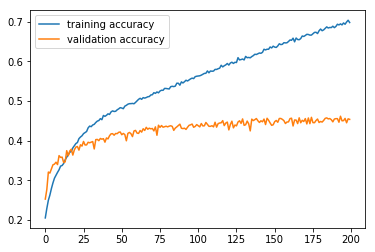

In [17]:
plot_epochs(history)
preds = np.argmax(model.predict(Xtest),axis = 1)
print(classification_report(y_true = np.argmax(ytest,axis=1), y_pred = preds))
print('\n')
print('accuracy', np.round(np.mean(preds ==  np.argmax(ytest,axis=1)),2))
print('\n')
print('confusion matrix')
print(confusion_matrix(y_true =  np.argmax(ytest,axis=1), y_pred = preds))